In [1]:
#테스트
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

In [2]:
okt = Okt()
text = 'soldesk에 오신 걸 환영합니다'

print(okt.morphs(text)) 

['soldesk', '에', '오신', '걸', '환영', '합니다']


In [3]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [4]:
inputFileName = '푸바오_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '자이언트 판다 ‘<b>푸바오</b>’ 인형이 59만원에 판매되면서 논란이 일고 있다. 온라인 커뮤니티 갈무리 에버랜드가 자이언트 판다 ‘<b>푸바오</b>’ 인형을 59만원에 판매해 논란이 일고 있다. 일부에서는 <b>푸바오</b> 실물과 비슷하다며... ',
  'link': 'https://www.kyeonggi.com/article/20240723580070',
  'org_link': 'https://www.kyeonggi.com/article/20240723580070',
  'pDate': '2024-07-23 11:52:00',
  'title': '&quot;중국서 만든 <b>푸바오</b> 인형 59만원&quot;...누리꾼 ‘갑론을박’'},
 {'cnt': 2,
  'description': '▲ <b>푸바오</b>,서울시,쓰촨성,오세훈 시장,판다 중국으로 반환된 ‘<b>푸바오</b>’를 다시 데려올 수 없느냐는 시민들 요청에 서울시가 “추진하고 있지 않다”고 밝혔다. 사진=연합뉴스 “‘<b>푸바오</b>’를 다시 데려올 수 없나요?”... ',
  'link': 'https://weekly.cnbnews.com/news/article.html?no=162295',
  'org_link': 'https://weekly.cnbnews.com/news/article.html?no=162295',
  'pDate': '2024-07-23 11:42:00',
  'title': '“‘<b>푸바오</b>’ 다시 데려와줘요” 요청에 서울시 답변은…'},
 {'cnt': 3,
  'description': "중국으로 반환된 <b>푸바오</b>를 다시 데려올 수 없느냐는 시민 민원에 서울시가 답변했다. 연합뉴스에 따르면 서울시는 23일 시민 제안 플랫폼 '상상대로 서울'에 &quot;서울시장과 쓰촨 정협주석 면담 시 <b>푸바오</b>의 빈자리에 대한... ",
  'link': 'https://www.s

In [7]:
description = ''
for item in data:
    if 'description' in item.keys():
        description = description +  re.sub(r"[^\w]",' ', item['description']) 
        
description[:100]

'자이언트 판다   b 푸바오  b   인형이 59만원에 판매되면서 논란이 일고 있다  온라인 커뮤니티 갈무리 에버랜드가 자이언트 판다   b 푸바오  b   인형을 59만원에 판매'

In [8]:
nlp = Okt()
message_N = nlp.nouns(description)
message_N[:10]

['자이언트', '판다', '바오', '인형', '판매', '논란', '일', '온라인', '커뮤니티', '갈무리']

In [9]:
count = Counter(message_N)
count

Counter({'바오': 3718,
         '판다': 943,
         '에버랜드': 639,
         '후': 510,
         '루': 476,
         '사육사': 446,
         '중국': 429,
         '강철원': 421,
         '의': 395,
         '패밀리': 351,
         '를': 345,
         '아이': 339,
         '러': 271,
         '월드': 247,
         '할부': 247,
         '쌍둥이': 232,
         '기지': 198,
         '마스코트': 181,
         '키퍼': 172,
         '수': 166,
         '생일': 162,
         '존': 158,
         '삼성': 148,
         '자이언트': 146,
         '지난': 144,
         '전지': 142,
         '강': 138,
         '선수': 132,
         '핑': 130,
         '사랑': 129,
         '일상': 128,
         '개월': 126,
         '플립': 126,
         '재회': 125,
         '시점': 125,
         '콘텐츠': 125,
         '전자': 119,
         '워룽': 118,
         '체험': 117,
         '동생': 116,
         '교감': 116,
         '등': 103,
         '엄마': 103,
         '방문': 100,
         '콘셉트': 100,
         '시간': 96,
         '플러스': 95,
         '갤럭시': 94,
         '진행': 94,
         '과': 93,
 

In [10]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_count[tag] = counts

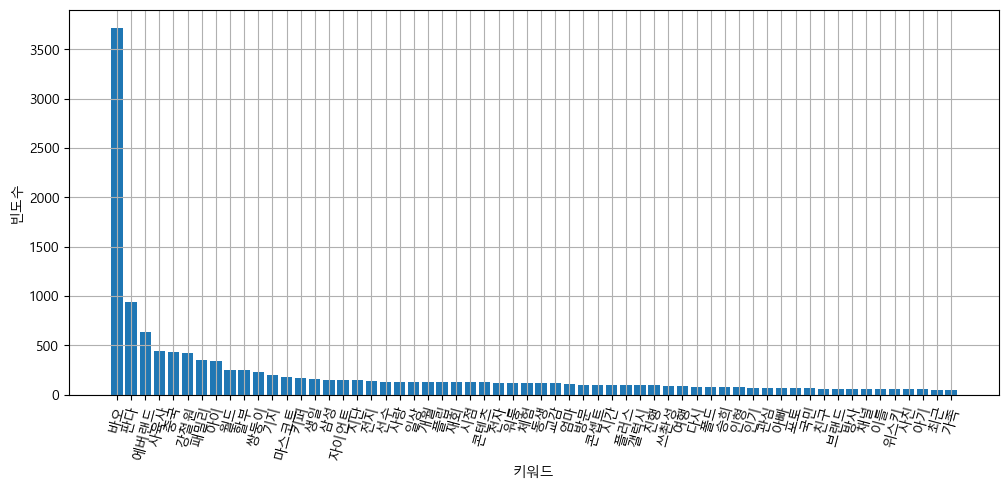

In [11]:
font_path = "c:/Windows/fonts/malgun.ttf" # win
#font_path = '/Library/Fonts/NanumBarunGothic.ttf', # mac 한글글씨체 
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)


plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

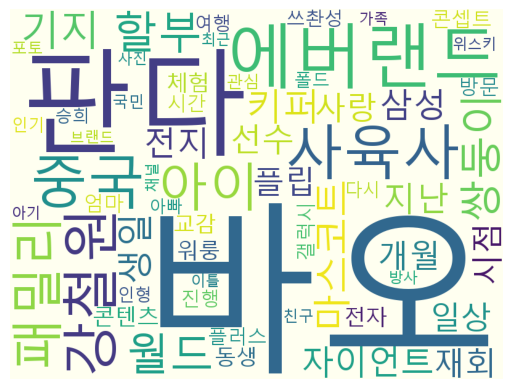

In [12]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off')
plt.show()